
#### Anomaly Detection - Project 2



## Tutorial

In this part of the assignment, we will implement an anomaly detection algorithm using the Gaussian model to detect anomalous behavior in a 2D dataset first and then a high-dimensional dataset.

Loading relevant libraries and the dataset

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


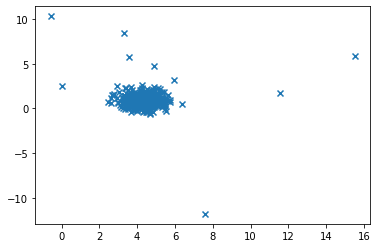

In [0]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=1,
                       cluster_std=0.60, random_state=0)
#print(y_true)
X_append, y_true_append = make_blobs(n_samples=10,centers=1,
                                    cluster_std=5,random_state=0)
X = np.vstack([X,X_append])
y_true = np.hstack([y_true, [1 for _ in y_true_append]])
X = X[:, ::-1] # flip axes for better plotting
plt.scatter(X[:,0],X[:,1],marker="x");
#print(y_true)

In [0]:
##try myself 
#from sklearn.datasets.samples_generator import make_blobs
#M, z_true = make_blobs(n_samples=100, centers=3,
 #                      cluster_std=0.60, random_state=0)
#M_append, z_true_append = make_blobs(n_samples=10,centers=3,
#                                    cluster_std=5,random_state=0)
#H = np.vstack([M,M_append])
#k_true = np.hstack([z_true, [10 for _ in z_true_append]])
#"""W = M[:, ::-1] # flip axes for better plotting
#plt.scatter(W[:,0],W[:,1],marker="x");


#print(M,"Break","\n",H,"\n","Next",W)"""
print(X.shape[0])

410


Here we've manufactured a dataset where some points are visibly outliers from the main distribution.

We can see this from looking at the plot, but how do we robustly identify the outliers? 

That's where a Gaussian estimation comes in. For this dataset, we only need a single Gaussian, for which we are gonna calculate the mean and standard deviation. Then, we're able to find the points that don't seem likely to have originated from that distribution - these are our outliers!

First, we need to calculate the mean and variance for our data. Complete the function below to generate these values using these formulae:

$$\mu = \frac{1}{m} \sum_{i=1}^{m}X_i$$

$$\sigma^2 = \frac{1}{m} \sum_{i=1}^{m}(X_i-\mu)^2$$

In [0]:
#def estimateGaussian(X):
#    """
#     This function provides an estimate of mean and variance 
#     of a Gaussian distribution along multiple dimensions
#     using X, an N-dimensional vector
#    """
    
#    m = X.shape[0]
    
    #compute mean of X
#    sum_ = 
#    mu = 
    
    # compute variance of X
#    var = 
    
#    return mu,var
#mu, sigma = estimateGaussian(X)
######################################################

def estimateGaussian(X):
    #"""
    # This function estimates the parameters of a Gaussian distribution using the data in X
    #"""
    
    m = X.shape[0]
    #print (X.shape,m)
    #compute mean of X
    sum_ = np.sum(X,axis=0)
    #print(sum_)
    mu = 1/m *sum_
    #print(mu)
    
    # compute variance of X
    var = 1/m * np.sum((X - mu)**2,axis=0)
    #print(var)
    return mu,var
mu, sigma = estimateGaussian(X)

print(mu,sigma,len(mu),sigma.T)


##Choose k



[4.30770882 0.9756171 ] [0.94147734 1.25990509] 2 [0.94147734 1.25990509]


Now, we will calculate for each point in X, the probability of the distribution $N(\mu,\sigma^2)$ generating that point randomly. This has been completed for you, although it is important to understand how the calculation of the PDF works.

In [0]:
from sklearn.metrics import precision_score

In [0]:
def multivariateGaussian(X, mu, sigma):
    """
    This function computes the probability density function of a multivariate gaussian distribution.
    """
    k = len(mu)
    
    
    sigma=np.diag(sigma)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))
    return p
    #print(k)
p = multivariateGaussian(X, mu, sigma)
#print(p,sorted(p))

Now that we have the probability of each point in the dataset, we can plot these on the original scatterplot:

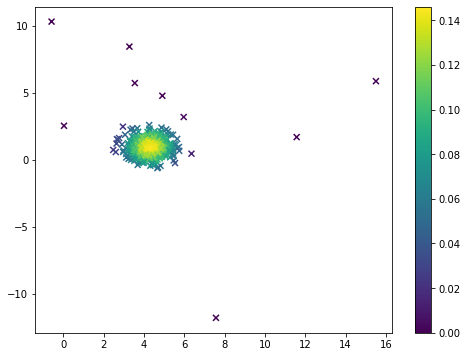

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
plt.colorbar();

We're getting closer to the point where we can programatically identify our outliers for a single Gaussian distribution. The last step is to identify a value for $p$, below which we consider a point to be an outlier. We term this $\epsilon$.

In [0]:
#Choose a value for epsilon

epsilon = 0.03

Now we'll highlight on the scatter plot all points that are below $\epsilon$:

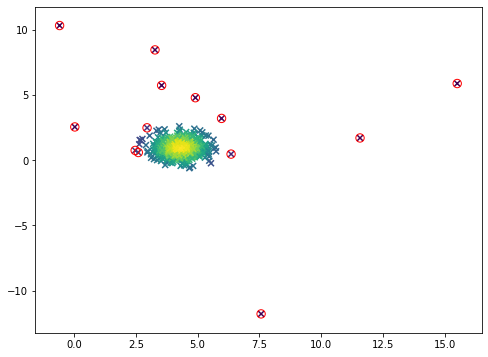

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0]
#print(np.nonzero(p<epsilon))
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);

How well did your epsilon value do? Play around with different values until you're happy with the plot above. 

We can additionally look at our model's classification performance another way. By sorting the points ascending by their probability, and classifying the first $k$ points as anomalous, we can determine the model's precision@k. Implement this in the cell below. 

* What is the highest value of K for which we get precision of 1.0? _  **K=10_**__
* What is the precision for K=4? __  **1**__

In [0]:
from sklearn.metrics import precision_score



In [0]:
#print(y_true)
#count=(y_true==1).sum()
#print(count)
for i in range(15):

    mn = sorted(p)[i]

    sc = precision_score(
            y_true, 1*(p<=mn)
        )
    
    print(p<mn)
    #print(y_true)
    #print(mn)
    print("k = {}: precision {} ".format(i+1, sc))
  

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

You may have noticed that in this example, we are training and testing on the _entire_ dataset. This is absolutely not standard practice! You should _always_ split into a training and testing set. However, the reason that we can get away with this here is because we don't actually use labels at all during training - this is an _unsupervised_ machine learning task. Unsupervised learning methods are beneficial for anomaly detection because in the real world (i.e. testing!) we might come across types of outliers that we didn't see during training. We want to use a method that can handle this, and unsupervised methods are often better suited to this type of domain.

For the next section, we'll move to Mixture of Gaussian models. Take a look at the following dataset:

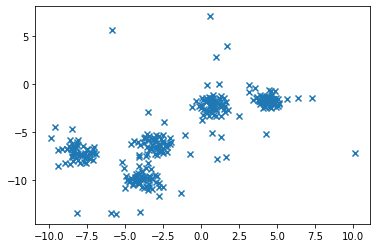

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
X, y_true = make_blobs(n_samples=400, centers=5,
                       cluster_std=0.60, random_state=1)
X_append, y_true_append = make_blobs(n_samples=50,centers=5,
                                    cluster_std=5,random_state=1)
X = np.vstack([X,X_append])
y_true = np.hstack([[0 for _ in y_true], [1 for _ in y_true_append]])
X = X[:, ::-1] # flip axes for better plotting

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.33, random_state=1, shuffle=True)

plt.scatter(X_train[:,0],X_train[:,1],marker="x");
#print(y_train)

Okay, we have more than one cluster centre now. So what? Let's just ignore that and use the same model as before. 

* What is the precision for k=1 in the cell below? _ **1.0**__
* k=10?          __   **0.9**_
* k=100? __**0.13**  _

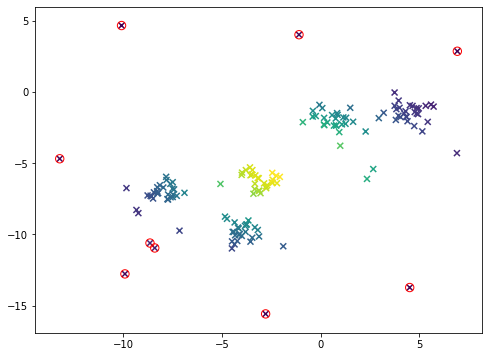

In [0]:
mu, sigma = estimateGaussian(X_train)
p = multivariateGaussian(X_test, mu, sigma)
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],marker="x",c=p,cmap='viridis');
outliers = np.nonzero(p<0.001)[0]
plt.scatter(X_test[outliers,0],X_test[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);



In [0]:
#print(y_true)
#count=(y_true==1).sum()
#print(count)
for i in range(100):

    mn = sorted(p)[i]

    sc = precision_score(
            y_test, 1*(p<=mn)
        )
    
    #print(p<mn)
    #print(p)
    #print(mn)
    #print("k = {}: precision {} ".format(i+1, sc))
    if i in [0,9,99]:
      print("k = {}: precision {} ".format(i+1, sc))
  

k = 1: precision 1.0 
k = 10: precision 0.9 
k = 100: precision 0.13 


Uh oh. This model performs terribly. It's fit the mean to a section of space where we don't have _any_ points, and it has absolutely no idea which points are outliers! This was probably pretty obvious to you though. We need to move to a Mixture of Gaussians model - one in which we use multiple Gaussians to fit the data. We'll use `sklearn.mixture.GaussianMixture` to do this - or rather you will! Use the documentation, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) to initialise and fit a `GaussianMixture` object called `gm` in the cell below.

In [0]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 5,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Now we can use the method `gm.predict_proba()` to get the probability of each data point being in any of the five clusters:

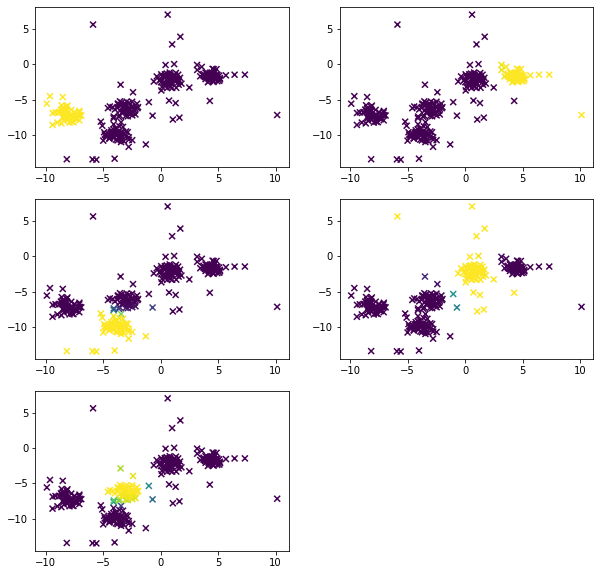

In [0]:
#plt.subplots(3,2,figsize=(8,6))
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.scatter(X_train[:,0],X_train[:,1],c=gm.predict_proba(X_train)[:,i],cmap='viridis',marker='x')
    #plt.colorbar()

#print (gm.predict_proba(X_train))    
#print (gm.predict_proba(X_train)[:,3])


Our Mixture of Gaussians model is powerful! Not only is it unsupervised, it can both classify points into one of the K clusters we have, _and_ it can help us with our ultimate goal of identifying outlier points! We can do this by finding the points that no cluster wants to claim for itself.
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#This part outputs the precision and recall on the test set

p_gm = gm.score_samples(X_test) #score_samples will compute the weighted log probabilities for each sample

for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
   precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
   recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times

#This part computes the ROC curves for both models like we talked about in class

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-p)
fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

Use the following formula to calculate the probability of each point, and set it to `p`:

$$p(x) = 1 - \bigg( \prod_{i=1}^{k} 1 - p(x \in k) \bigg)$$

This formula returns the probability that the datapoint was produced at random by _any_ of the Gaussians we fit. Hence, we want to filter out anything without a very high probability of this.

In the cell below, calculate these values and then compute precision@k for k=1, 10, and 100.

* Is this model better or worse performing than the previous? _  **Better**__
* Why might that be? __  **Because we have multiple centers for our dataset to calculate probability of a point belonging to any cluster rather than a single center dataset. It makes sense to have better precision by using mixture of Gaussians to fit our data.** 

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
p_gm = gm.score_samples(X_test) #score_samples will compute the weighted log probabilities for each sample

for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
   precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
   recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times

For a k of  1  the precision is  1.000  and the recall is  0.056
For a k of  10  the precision is  1.000  and the recall is  0.556
For a k of  100  the precision is  0.180  and the recall is  1.000


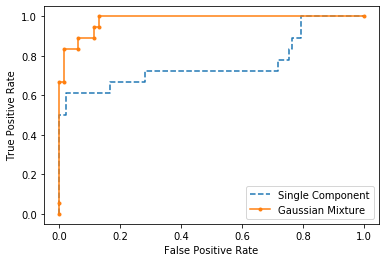

In [0]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-p)
fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()


In [0]:
p_gm = gm.score_samples(X_test)
print(X_test.shape,p_gm.shape)
#print(X_test.shape,ps.shape,y_test)

(149, 2) (149,)


In [0]:
#print(y_true)
#count=(y_true==1).sum()
#print(count)
for i in range(len(p_gm)):

    mn_gm = sorted(p_gm)[i]
    #print("for cluster={}:".format(i+1))
    #for i in range(100):

    sc = precision_score(y_test, p_gm<=mn_gm)
    recall = recall_score(y_test, p_gm <=mn_gm)        
    
    #print(p<mn)
    #print(p)
    #print(mn)
    #print("k = {}: precision {} ".format(i+1, sc))
    if i in [0,9,99]:
      print("k = {}: precision {} ".format(i+1, sc),";","recall is",'%.3f'%recall)

k = 1: precision 1.0  ; recall is 0.056
k = 10: precision 1.0  ; recall is 0.556
k = 100: precision 0.18  ; recall is 1.000


Although our MoG model doesn't perfectly identify all the outliers, it performs way better than our previous model, again without any label information to help it along!

Let's look at a dataset that motivates using a Mixture of Gaussians model: Simpsons ratings.

Everyone knows that there's a certain point when The Simpsons "got bad", but can we use a Mixture of Gaussians to find out exactly when that was?

Load up the `simpsons.pickle` file using the cell below. It contains the IMDb rating for every simpsons episode.

In [0]:
!wget https://github.com/alexwolson/APS1070_data/raw/master/simpsons.pickle
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
with open('simpsons.pickle','rb') as f:
    simpsons = pickle.load(f)

--2019-10-25 20:49:48--  https://github.com/alexwolson/APS1070_data/raw/master/simpsons.pickle
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexwolson/APS1070_data/master/simpsons.pickle [following]
--2019-10-25 20:49:48--  https://raw.githubusercontent.com/alexwolson/APS1070_data/master/simpsons.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26076 (25K) [application/octet-stream]
Saving to: ‘simpsons.pickle’

simpsons.pickle     100%[===================>]  25.46K  --.-KB/s    in 0.01s   

2019-10-25 20:49:48 (2.03 MB/s) - ‘simpsons.pickle’ saved [26076/26076]



With `plt.hist`, plot a histogram of the rating distribution for all Simpsons episodes. 

* What is the modal rating? _  **The highest rating is roughly 7.1**_
* What is the range of ratings? _  **The range is (4, 9.3)**_

Range is between 4.0 and 9.3
Mode is 7.1


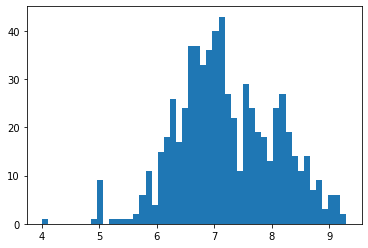

In [0]:
#plt.hist(simpsons)
#print(simpsons.values())
#print(simpsons.values().values())
#simpVal=simpsons.values()
allratings=[]

for v in simpsons.values():
  for v1 in v.values(): 
    #print(v1)
    allratings.append(v1)
    #print(v1)   
plt.hist(allratings,bins=50)
#plt.show()
#print(allratings) list
# from collection import counter
#count(allrating).most_common(1)
print("Range is between", min(allratings),"and",max(allratings))
print("Mode is",max(set(allratings), key=allratings.count))
  

Next, use `sklearn.mixture.GaussianMixture` to fit a Mixture of Gaussians to the Simpsons rating distribution. Since we are trying to distinguish between good and bad ratings, we only need 2 gaussians.

* What are the means for the two Gaussians fit by the model? _  **The means are 6.7734 and 8,1794 respectively.**_
* What about the standard deviations?   **The standard deviations are 0.3563 and 0.2248 respectively.**__

In [0]:
from sklearn.mixture import GaussianMixture
gm_sim = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
gmm=gm_sim.fit(np.array(allratings).reshape(-1,1))

mean=gmm.means_
std=gmm.covariances_
#print(gm_sim)

print(mean,"\n","\n", std)

[[6.7734211 ]
 [8.17942889]] 
 
 [[[0.35628129]]

 [[0.22479224]]]


Finally, using the `GaussianMixture.predict()` method, we can use maximum likelihood to estimate which distribution, good or bad, each episode belongs to. In the cell below, count the number of episodes predicted to be in the "good" distribution per season, and plot using `plt.plot`.

* Where is the notable drop-off point? _  **The drop-off point happens at season 10.**_
* When is the first season with 0 good episodes? __  **The first season without good ones is season 15.** 

1
[1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1]
2
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]
3
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
4
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
5
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
6
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
7
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
9
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
11
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
12
[1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
13
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]
14
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
15
[0, 0, 0, 0

<function matplotlib.pyplot.show>

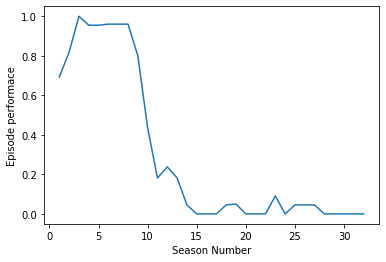

In [0]:
simpsons = dict(sorted(list(simpsons.items()), key=lambda x: x[0]))
#print(simpsons)
#p_simpsons=gmm.predict(np.array(allratings).reshape(-1,1))
season_list=[]
number_episode_list=[]
good_percentage_list=[]

for season,info in simpsons.items(): 
  print(season)
  season_list.append(season)
  rating_list=[]
  for episode, ratings in info.items(): 
      predit=gmm.predict(np.array(ratings).reshape(1,-1))
      rating_list.append(predit[0])
      #print(predit[0])
      #count=sum(predit==[1])
  #print(count)
  print(rating_list)
  #print(sum(rating_list))
  #print(len(rating_list))
  good_percentage=sum(rating_list)/len(rating_list)
  #print(good_percentage)
  number_episode_list.append(len(rating_list)) 
  good_percentage_list.append(good_percentage)
  if good_percentage==0:
    print("Season",season,"has no good episodes at all.")
#print(season_list)
print(number_episode_list)
print(good_percentage_list)

plt.plot(season_list,good_percentage_list)
plt.xlabel("Season Number")
plt.ylabel("Episode performace")
plt.show

#good=sum(p_simpsons==1)
#good
#plt.plot(p_simpsons)
#print(p_simpsons)
#season_number=[]
#print(simpsons.items()) key+value
#print(simpsons.values()) outer values 


  


 



In [0]:
#Xs = []
#Ys = []
#simpsons = dict(sorted(list(simpsons.items()), key=lambda x: x[0]))
#for season, episodes in simpsons.items():
#     bad = 0
#     good = 0
#     for episode in episodes.values():
#          if gmm.predict(np.array(
#               episode
#          ).reshape(-1,1)) == 0:
#              good += 1
#          else:
#               bad += 1
#     Xs.append(season)
#     Ys.append(bad/(good+bad))
#plt.plot(Xs,Ys)


In [0]:
"""#Let's first associate each component with a good or bad season
if gmm.means_[0,0] > gmm.means_[1,0]: #True if first component is the good season (ie, higher mean)
     Good_season_index = 0
else:
     Good_season_index = 1

Xs = []
Ys = []
simpsons = dict(sorted(list(simpsons.items()), key=lambda x: x[0]))
for season, episodes in simpsons.items():
     bad = 0
     good = 0
     for episode in episodes.values():
          if gmm.predict(np.array(
               episode
          ).reshape(-1,1)) == Good_season_index:
               good += 1
          else:
               bad += 1
     Xs.append(season)
     Ys.append(good/(good+bad))
plt.plot(Xs,Ys);
"""

"#Let's first associate each component with a good or bad season\nif gmm.means_[0,0] > gmm.means_[1,0]: #True if first component is the good season (ie, higher mean)\n     Good_season_index = 0\nelse:\n     Good_season_index = 1\n\nXs = []\nYs = []\nsimpsons = dict(sorted(list(simpsons.items()), key=lambda x: x[0]))\nfor season, episodes in simpsons.items():\n     bad = 0\n     good = 0\n     for episode in episodes.values():\n          if gmm.predict(np.array(\n               episode\n          ).reshape(-1,1)) == Good_season_index:\n               good += 1\n          else:\n               bad += 1\n     Xs.append(season)\n     Ys.append(good/(good+bad))\nplt.plot(Xs,Ys);\n"

## Exercises

Now we are going to work with a credit card fraud dataset (more detail can be found [here](https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3)). This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load up the dataset using Pandas' `read_csv` function. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there?[1] __  **284807 rows**___
* What features in the dataset are present aside from the 28 main features?[1] _  **Time, Amount and Class**____
* Why do you think the main features are given to us in this way?[1] _   **"Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount' ". We can't know more than that due to confidentiality issues.**  ____
* Which column contains the targets? Can you figure out what the values correspond to?[1] __  **The rightmost column under the name "Class" contains the targets. 0 means no fraud, and 1 means fraud.**___

In [0]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=332463fdcaf70d3e9d04315d811502c9716d7b735de28a5ee2d249768b656b0f
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import wget
wget.download('https://github.com/alexwolson/APS1070_data/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [0]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
df=pd.read_csv('creditcard.csv')
df.iloc[:,1:29]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [0]:
#df.iloc[:,-1]

In [0]:
df.describe()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


It's always important when looking at a new dataset to figure out how many rows we have for each class.

* What is the percentage of entries in the dataset for each class?[1] __  **99.827% for class 0 whereas 0.173% for class 1.**___
* Why might this pose a problem with methods we have looked at so far?[1] __  **We might not have sufficient data to train our model to acheive precise results to distinguish class 1.** ___



In [0]:
count=df.shape[0]
percent_0=sum(df["Class"]==0)/count*100
percent_1=sum(df["Class"]==1)/count*100

print(percent_0,percent_1)

99.82725143693798 0.1727485630620034


Next, split the dataset into a training and testing set using sklearn's `train_test_split` function. Use a test size of one third, and set the random state to 0.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in these exercises we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V24? Make sure to only use your training set for this.[1] _    **Mean is 0.00042967016116414686 and standard deviation is 0.6048294388274841.**____

Use the code below to set up a Gaussian object for V24.

In [0]:
##split
X_train, X_test, y_train,y_test=train_test_split(df.iloc[:,1:29],df.iloc[:,-1],test_size=1/3,random_state=0)
#print(df.loc[[159220]])
mean=X_train.V24.mean()
std=X_train.V24.std()
print(mean, std)
print(y_test)

0.00042967016116414686 0.6048294388274841
183484    0
255448    0
244749    0
63919     0
11475     0
         ..
24733     0
58321     0
59929     0
235872    0
165631    0
Name: Class, Length: 94936, dtype: int64


In [0]:
from scipy import stats

norm = stats.norm(loc=df["V24"].mean(), scale=df["V24"].std()
    
)


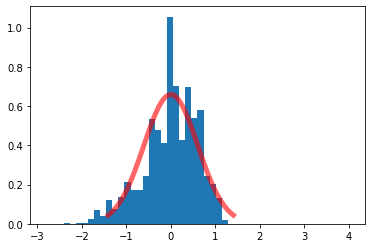

In [0]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train['V24'].values, density=True, histtype='stepfilled', bins=50);
plt.show()

We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

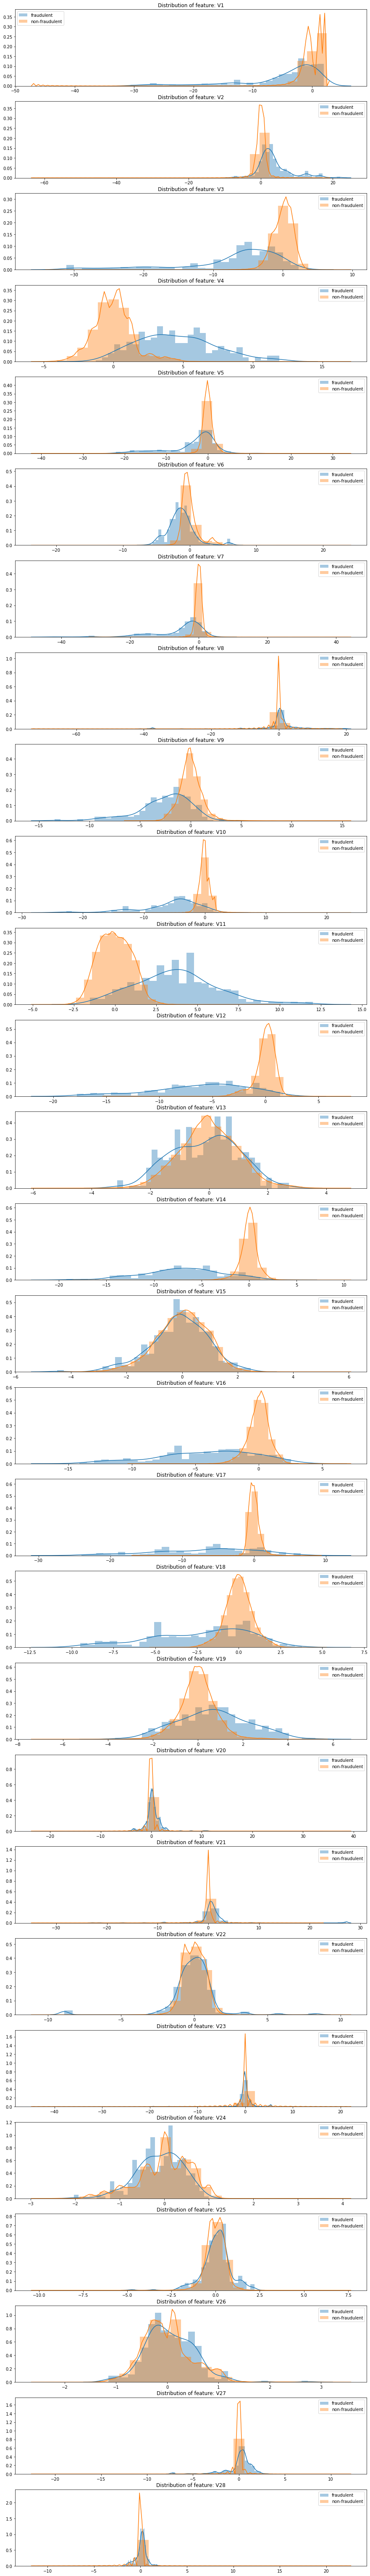

In [0]:
import matplotlib.gridspec as gridspec
import seaborn as sns
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0],bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Build an outlier detection model using a Mixture of Gaussians using a subset of features of your choice (pick a few) and a number of mixture components. Report both the precision@k and recall@k for k=1, 10 and 100 (on test data). Repeat this model creation process at least 4 more times, each time selecting different parameters (features selected, number of mixture components), and reporting the precision and recall as above. Organize your findings in a table or plot and describe your findings. What can you conclude about what models work best? [3]
**Firstly, I picked the features with the lowest overlaped areas between fraudulent and non-fraudulent because it is easier for model to distinguish these two classes separately. Then I tried different scenarios by using different numbers of components and features in the for loop. I found out that by selecting features V12 and V14 with number of component equal to 1, I can acheive the best precision and recall scores. So it is not necessary for the model to fit infinite features or having more number of components than needed because it will introduce noise data as well.**

In [0]:
#plt.subplots(3,2,figsize=(8,6))
#plt.figure(figsize=(10,10))
#for i in range(5):
#    plt.subplot(3,2,i+1)
#    plt.scatter(X_train[:,0],X_train[:,1],c=gm_credit.predict_proba(X_train)[:,i],cmap='viridis',marker='x')
    #plt.colorbar()

#print (gm.predict_proba(X_train))    
#print (gm.predict_proba(X_train)[:,3])
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [0]:
#!pip install prettyTable
#!pip install ptable

!pip install BeautifulTable


In [0]:
from beautifultable import BeautifulTable

#from prettytable import PrettyTable




In [0]:
# 4,12,

#print(y_test)
#V_ls=[] #scenario values
#j_ls=[]# component number
#i_list=[]
#precision_list=[]
#recall_list=[]

from sklearn.mixture import GaussianMixture 

scenario={
    1:["V4"],
    2:["V12"],
    3:["V14"],
    4:["V12","V14"],
    5:["V17","V12"],
    6:["V12","V14","V17"],
    7:["V17"],
    8:["V16"],
    9:["V12","V14","V17","V16"],
    10:["V12","V14","V17","V16","V4"]
    
}

for j in range(1,5):

  gm_credit = GaussianMixture(n_components = j,
                    covariance_type = 'full', random_state=0, )
  print(color.PURPLE,"With number of components=",j,color.END)
  
  
    
  for V in scenario.values(): 
    
    gm_credit.fit(X_train[V],y_train)
    #gm_credit.fit(X_train[["V12","V14"]],y_train)
    
    print(color.BOLD,"Scenario for",V,":",color.END)


    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    p_gm_credit = gm_credit.score_samples(X_test[V])
    #p_gm_credit = gm_credit.score_samples(X_test[["V12","V14"]]) #score_samples will compute the weighted log probabilities for each sample

    table = BeautifulTable()
    #table = PrettyTable() 
    
    table.column_headers = ["K value", "precision", "recall"] 
    #table.title = ["Scenario for",V]
    #table.field_names = ["K value", "precision", "recall"]
    
    
    for i in [1, 10, 100]: #Let's look at 3 different k values
       mn_gm_credit = sorted(p_gm_credit)[i] #We sort the points by probability, as before
       #print(p_gm_credit < mn_gm_credit)
       precision = precision_score(y_test, p_gm_credit < mn_gm_credit) #Here, we compare y_test labels to our picks using precision
       recall = recall_score(y_test, p_gm_credit < mn_gm_credit) #Here, we compare y_test labels to our picks using recall
       #print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times
       table.append_row([i,precision,recall])
       #table.add_row([i,precision,recall])
       
    print(table)
    print("\n")

 With number of components= 1 
 Scenario for ['V4'] : 
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
+---------+-----------+--------+
| K value | precision | recall |
+---------+-----------+--------+
|    1    |    0.0    |  0.0   |
+---------+-----------+--------+
|   10    |    0.7    | 0.043  |
+---------+-----------+--------+
|   100   |    0.5    | 0.305  |
+---------+-----------+--------+


 Scenario for ['V12'] : 
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
+---------+-----------+--------+
| K value | precision | recall |
+---------+-----------+--------+
|    1    |    1.0    | 0.006  |
+---------+-----------+--------+
|   10    |    1.0    | 0.061  |
+---------+-----------+--------+
|   100   |   0.82    |  0.5   |
+---------+-----------+--------+


 Scenario for ['V14'] : 
[False False False ... False False False]
[Fa